In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
# y_true = 30
# y_pred = 20

# b1 => 10
# b2 => 8
# b3 => 15

(10 + 8 + 15) / 3

11.0

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [4]:
ls data

mens_shoe_prices.csv


In [5]:
df = pd.read_csv('data/mens_shoe_prices.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [8]:
[3] * 5

[3, 3, 3, 3, 3]

In [9]:
y_true = df['prices_amountmin']
#y_true.shape[0]
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

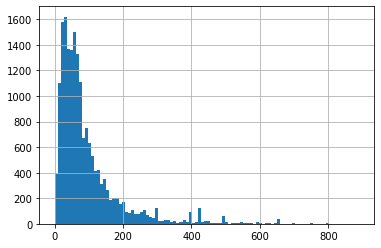

In [10]:
df['prices_amountmin'].hist(bins=100)

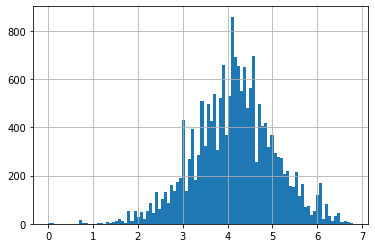

In [11]:
#np.log(df['prices_amountmin'] + 1).hist(bins=100)
np.log1p(df['prices_amountmin']).hist(bins=100)

In [12]:
np.log(0 + 1)

0.0

In [13]:
np.log1p(0)

0.0

In [14]:
y_true = df['prices_amountmin']
#y_true.shape[0]
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [15]:
np.median(y_true)

64.95

In [16]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
#y_true.shape[0]
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [17]:
np.log1p(y_true)

0        3.710886
1        3.970103
2        3.714060
3        3.937886
4        3.855664
           ...   
18275    3.432373
18276    4.188897
18277    3.510948
18278    3.480625
18279    4.290459
Name: prices_amountmin, Length: 18280, dtype: float64

In [18]:
np.mean(np.log1p(y_true))

4.157759197235119

In [19]:
np.exp(np.mean(np.log1p(y_true))) - 1

62.92811169273113

In [20]:
np.expm1(np.mean(np.log1p(y_true)))

62.92811169273113

In [21]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [22]:
df.brand.value_counts()

Nike                   1709
PUMA                    574
Ralph Lauren            524
New Balance             361
VANS                    356
                       ... 
Fashion Helpers           1
Walk Over                 1
Smoky                     1
ZLYC                      1
Salvatore Ferragamo       1
Name: brand, Length: 1856, dtype: int64

In [23]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [25]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [27]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [28]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [29]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908595, 4.311223231615431)

In [30]:
df

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat,manufacturer_cat
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,True,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN,0,-1
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,1,-1
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,1,-1
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZS

In [31]:
df['prices_warranty'].value_counts()

Limited Warranty period (parts): 1 year. Limited Warranty period (labor): 1 year                                                                                                                         17
One year warranty from date of purchase against defects in workmanship or material.                                                                                                                      10
Satisfaction Guaranteed provided to consumer                                                                                                                                                              7
2 Year Warranty                                                                                                                                                                                           7
LIMITED WARRANTY - Sperian Protection warrants that its products are free from defects in material and workmanship. For details regarding specific brand and product warranties, call 1-

In [32]:
df['quantities'].value_counts()

Series([], Name: quantities, dtype: int64)

In [33]:
df['colors'].value_counts()

Black                            1364
Brown                             746
Blue                              421
Multicolor                        415
White                             252
                                 ... 
Military Brownblackdark Khaki       1
Papyrus                             1
Big  Tall                           1
Suede Dachshund                     1
Twbb                                1
Name: colors, Length: 2080, dtype: int64

In [34]:
df['colors_cat'] = df['colors'].factorize()[0]
run_model(['colors_cat'])

(-62.72404880129134, 5.053649873215771)

In [35]:
df['prices_warranty_cat'] = df['prices_warranty'].factorize()[0]
run_model(['prices_warranty_cat'])

(-63.91559657263372, 3.6386026312102056)

In [36]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat', 'prices_warranty_cat'])

(-61.66339512230074, 5.5623388062005334)

In [37]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat'])

(-61.76723637561054, 5.743222840525908)

In [38]:
df['weight_cat'] = df['weight'].factorize()[0]
run_model(['weight_cat'])

(-63.772166611222204, 3.629081601136923)

In [39]:
df['name_cat'] = df['name'].factorize()[0]
run_model(['name_cat'])

(-62.80860350146927, 3.7143153110241443)

In [40]:
df['sizes_cat'] = df['sizes'].factorize()[0]
run_model(['sizes_cat'])

(-63.76881712833142, 3.780048659503436)

In [41]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat', 'sizes_cat', 'weight_cat'])

(-61.638341548773134, 5.479142159875277)

In [42]:
run_model(['brand_cat', 'manufacturer_cat', 'sizes_cat', 'weight_cat'])

(-58.92033015162532, 4.502879508250053)

In [43]:
run_model(['brand_cat', 'manufacturer_cat', 'weight_cat'])

(-58.64679746843634, 4.4429008839734845)

In [44]:
run_model(['brand_cat', 'weight_cat'])

(-58.549527456484476, 4.453037441950453)

In [45]:
run_model(['brand_cat', 'weight_cat', 'colors_cat'])

(-61.52175426077175, 5.569746041780163)